# Importation des bibliothèques nécessaires et du fichier csv

In [89]:
import pandas as pd
import sklearn as sl
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelBinarizer

df=pd.read_csv("breast-cancer.csv", sep=",")

df

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class
0,40-49,premeno,15-19,0-2,yes,3,right,left_up,no,recurrence-events
1,50-59,ge40,15-19,0-2,no,1,right,central,no,no-recurrence-events
2,50-59,ge40,35-39,0-2,no,2,left,left_low,no,recurrence-events
3,40-49,premeno,35-39,0-2,yes,3,right,left_low,yes,no-recurrence-events
4,40-49,premeno,30-34,3-5,yes,2,left,right_up,no,recurrence-events
...,...,...,...,...,...,...,...,...,...,...
281,50-59,ge40,30-34,6-8,yes,2,left,left_low,no,no-recurrence-events
282,50-59,premeno,25-29,3-5,yes,2,left,left_low,yes,no-recurrence-events
283,30-39,premeno,30-34,6-8,yes,2,right,right_up,no,no-recurrence-events
284,50-59,premeno,15-19,0-2,no,2,right,left_low,no,no-recurrence-events


LabelEncoder :
    Utilisé pour encoder des variables catégoriques ordinales (c'est-à-dire des catégories avec un ordre) en valeurs numériques.
    Exemple : Si une colonne a des catégories comme "petit", "moyen", "grand", vous pourriez utiliser LabelEncoder pour encoder ces catégories en 0, 1, 2.

OrdinalEncoder :
    Similaire à LabelEncoder, il est utilisé pour encoder des variables catégoriques ordinales, mais peut gérer plusieurs colonnes simultanément.
    Exemple : Si vous avez plusieurs colonnes avec des catégories ordinales, vous pouvez utiliser OrdinalEncoder.

LabelBinarizer :
    Utilisé pour convertir une colonne de catégories en une matrice binaire (0/1). Il est souvent utilisé pour encoder la variable cible binaire.
    Exemple : Si votre colonne "Class" a deux catégories comme "recurrence-events" et "no-recurrence-events", vous pourriez utiliser LabelBinarizer pour les encoder en 0 et 1.

OneHotEncoder :
    Utilisé pour encoder des variables catégoriques nominales (c'est-à-dire des catégories sans ordre) en un format binaire avec des colonnes distinctes pour chaque catégorie.
    Exemple : Si vous avez une colonne comme "breast-quad" avec des catégories distinctes comme "left_up", "central", "left_low", vous pourriez utiliser OneHotEncoder pour créer des colonnes distinctes pour chaque catégorie.

On a les catégories suivantes : age, menopause, tumor-size, inv-nodes, node-caps, deg-malig, breast, breast-quad, irradiat, Class

age : Catégorie ordinale => OrdinalEncoder<br />
menopause : Catégorie ordinale => OrdinalEncoder<br />
tumor-size: Catégorie ordinale => OrdinalEncoder<br />
inv-nodes : Catégorie ordinale => OrdinalEncoder<br />
node-caps : Catégorie nominale => OneHotEncoder<br />
deg-malig : Catégorie ordinale => OrdinalEncoder<br />
breast : Catégorie nominale => OneHotEncoder<br />
breast-quad : Catégorie nominale => OrdinalEncoder<br />
irradiat : Catégorie nominale => OneHotEncoder<br />
Class : Catégorie binaire => OrdinalEncoder<br />

Exemple ci-dessous :

In [90]:
# Encoder pour la colonne 'age' (OrdinalEncoder)
ordinal_encoder_age = OrdinalEncoder(categories=[['20-29', '30-39', '40-49', '50-59', '60-69', '70-79']])
df['age_encoded'] = ordinal_encoder_age.fit_transform(df[['age']])

# Encoder pour la colonne 'menopause' (OrdinalEncoder)
ordinal_encoder_menopause = OrdinalEncoder(categories=[['lt40', 'ge40', 'premeno']])
df['menopause_encoded'] = ordinal_encoder_menopause.fit_transform(df[['menopause']])

df

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class,age_encoded,menopause_encoded
0,40-49,premeno,15-19,0-2,yes,3,right,left_up,no,recurrence-events,2.0,2.0
1,50-59,ge40,15-19,0-2,no,1,right,central,no,no-recurrence-events,3.0,1.0
2,50-59,ge40,35-39,0-2,no,2,left,left_low,no,recurrence-events,3.0,1.0
3,40-49,premeno,35-39,0-2,yes,3,right,left_low,yes,no-recurrence-events,2.0,2.0
4,40-49,premeno,30-34,3-5,yes,2,left,right_up,no,recurrence-events,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
281,50-59,ge40,30-34,6-8,yes,2,left,left_low,no,no-recurrence-events,3.0,1.0
282,50-59,premeno,25-29,3-5,yes,2,left,left_low,yes,no-recurrence-events,3.0,2.0
283,30-39,premeno,30-34,6-8,yes,2,right,right_up,no,no-recurrence-events,1.0,2.0
284,50-59,premeno,15-19,0-2,no,2,right,left_low,no,no-recurrence-events,3.0,2.0


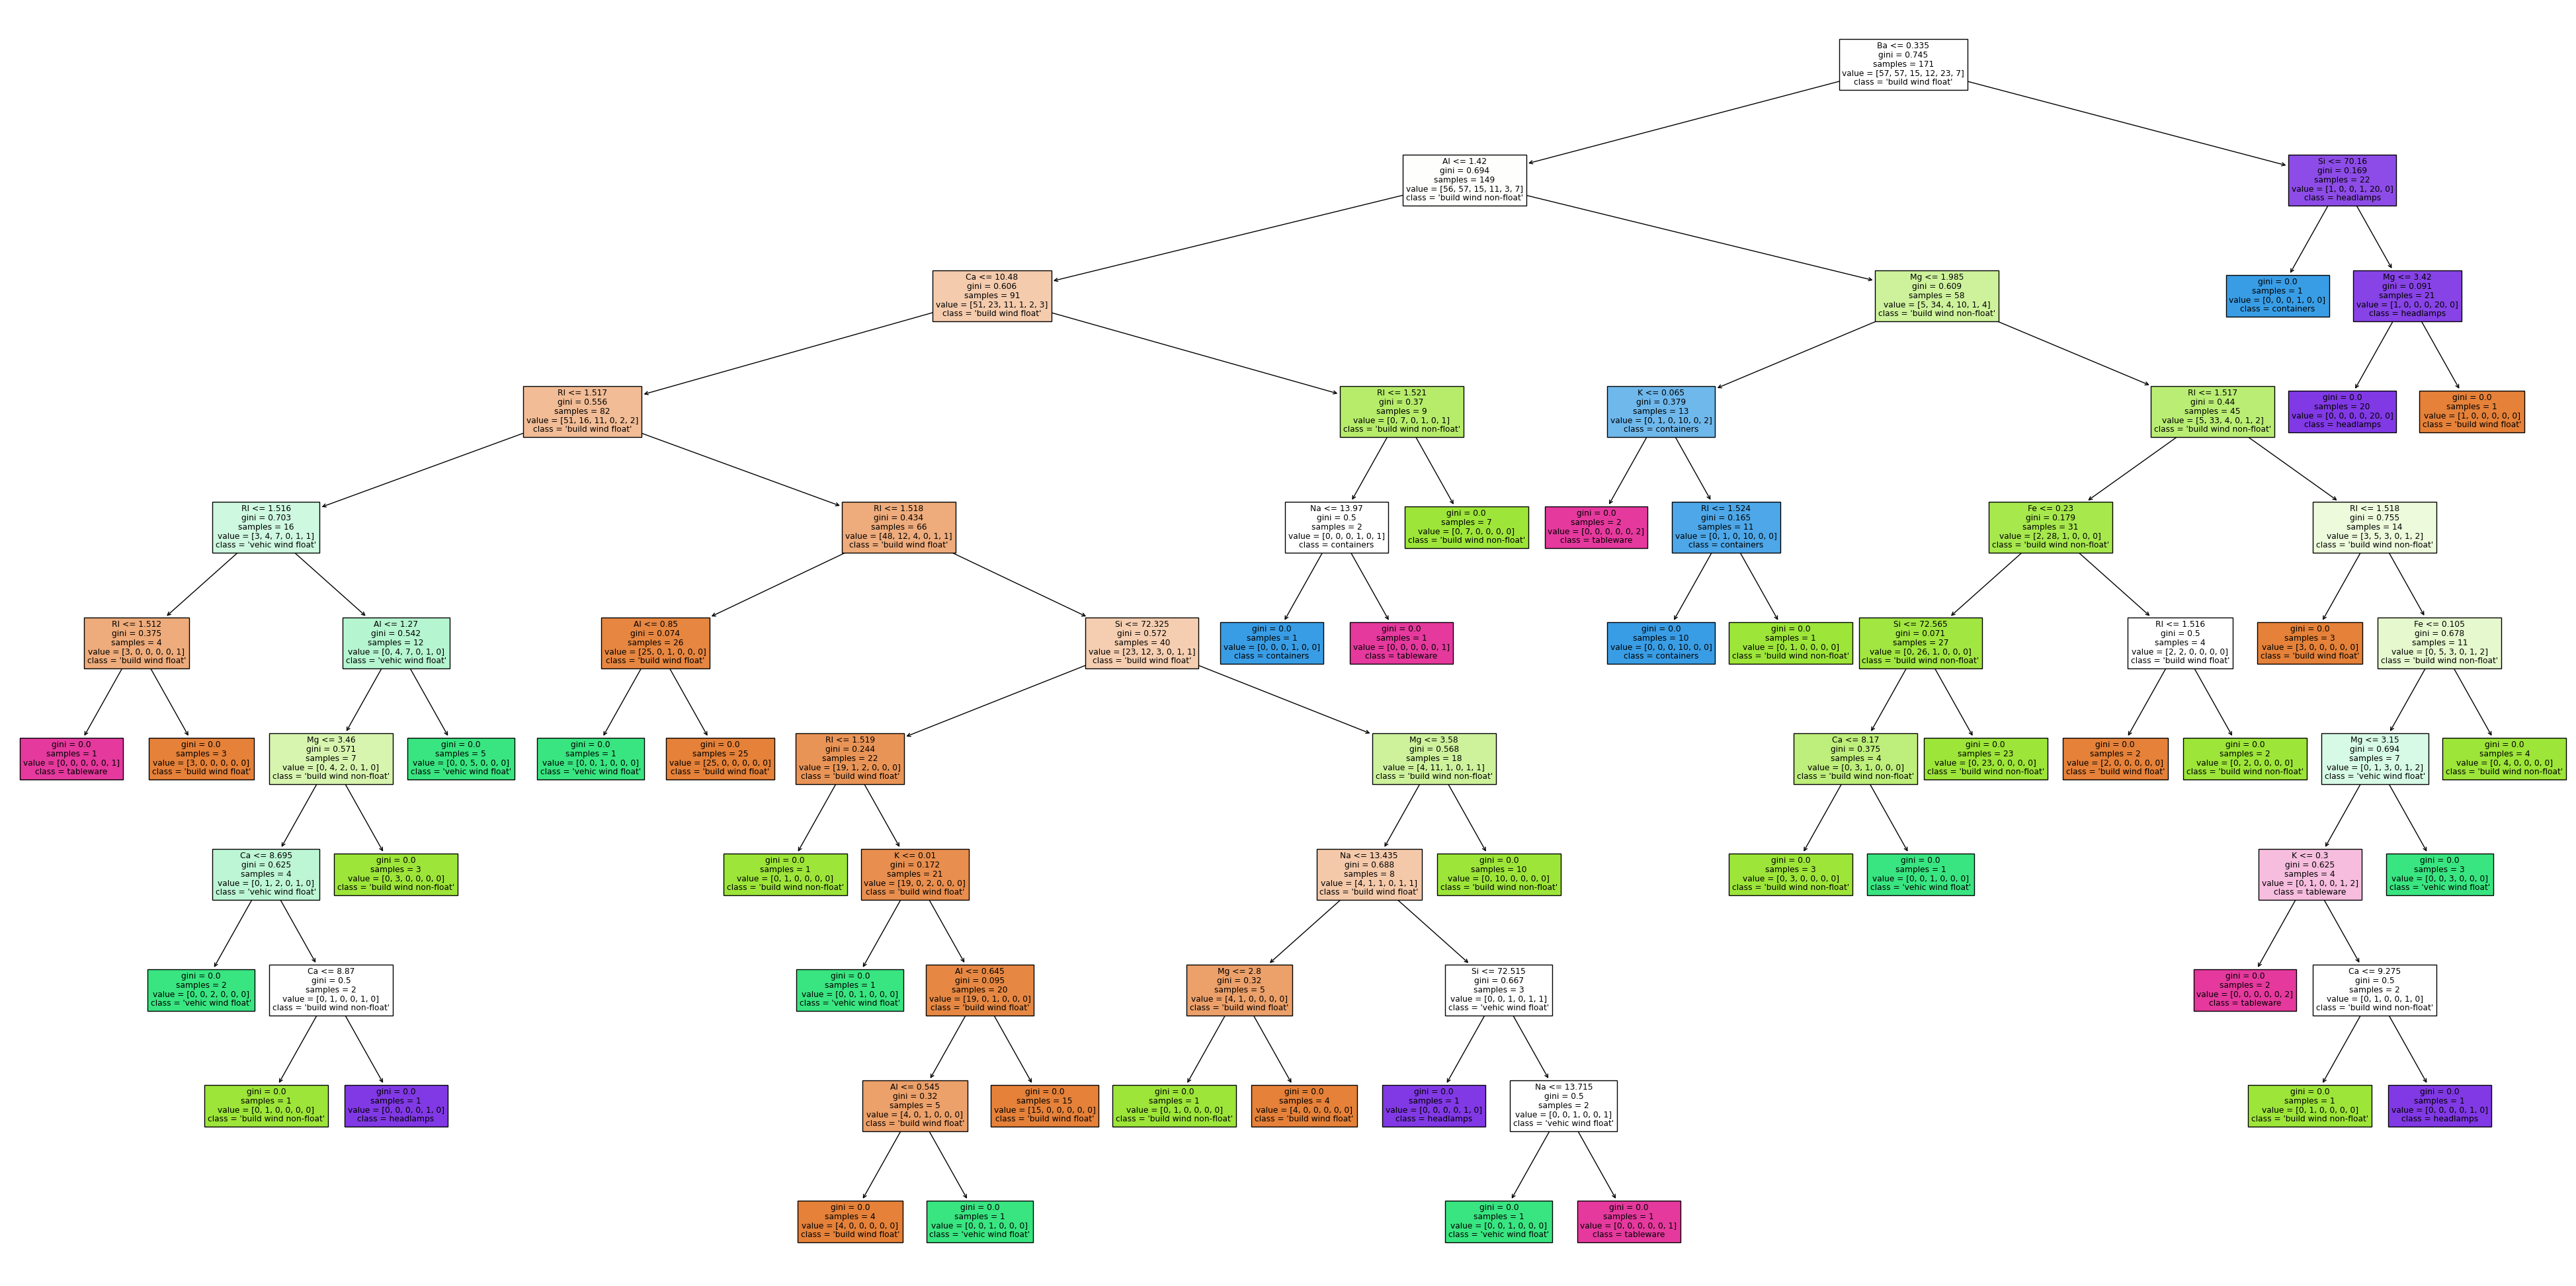

In [114]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

df = pd.read_csv("glass.csv")

X = df.iloc[:, :-1] 
y = df.iloc[:, -1]   

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(X_train, y_train)

plt.figure(figsize=(50, 25))

class_names = tree_classifier.classes_.astype(str).tolist()
plot_tree(tree_classifier, filled=True, feature_names=X.columns.tolist(), class_names=class_names)
plt.show()

In [103]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

y_pred = tree_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

precision = precision_score(y_test, y_pred, average='weighted')
print(f"Precision: {precision:.4f}")

recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall: {recall:.4f}")

Accuracy: 0.7209
Precision: 0.7860
Recall: 0.7209


In [105]:
from sklearn.model_selection import cross_val_score

# cv = 9 car seulement 9 valeurs
cv_scores = cross_val_score(tree_classifier, X, y, cv=9, scoring='accuracy')
error_rate = 1 - cv_scores.mean()

print(f"Taux d'erreur moyen : {error_rate:.4f}")


Taux d'erreur moyen : 0.2705


In [111]:
from sklearn.model_selection import GridSearchCV
import numpy as np

dtree_model = DecisionTreeClassifier(random_state=42)

param_grid = {
                'criterion':['gini','entropy'],
                'max_depth': np.arange(3, 15)
             }


grid_search = GridSearchCV(dtree_model, param_grid, cv=9)
grid_search.fit(X, y)

print(f"Meilleurs hyperparamètres: {grid_search.best_params_}")
print(f"Meilleur score: {grid_search.best_score_}")

Meilleurs hyperparamètres: {'criterion': 'gini', 'max_depth': 12}
Meilleur score: 0.7294685990338164
